In [263]:
import sys
print (sys.version)
# init
#%matplotlib widget
#%matplotlib inline
import numpy as np
from sympy import *
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
#%matplotlib notebook
from IPython.display import display, Markdown, Latex

3.10.8 (main, Oct 13 2022, 10:17:43) [Clang 14.0.0 (clang-1400.0.29.102)]


In [264]:
def EqPrint(lhs, rhs):
    return Markdown(f"${lhs} = "f"{latex(rhs)}$")

In [373]:
# u, v, t = symbols('u v t', real=True)
u, v, t = symbols('u v t')
x, y, z = symbols('x y z')
a, b, c = symbols('a b c')

# Hjemmeopgave 5
Differentialgeometri og Parametrisk design - 01237

Kaare G. S. Hansen, s214282, DTU

8\. november 2022

## Opgave 3 fra E15
En cirkulær fodpunktskurve for en bevægelse i rummet er givet således:
$$
\mathbf{p}(t)=(2 \cos (t), 2 \sin (t), 0) \quad, \quad \text { for } \quad \mathrm{t} \in[0,2 \pi] \text {. }
$$

In [316]:
p = Matrix([[2*cos(t), 2*sin(t), 0]])
t_dom = (t, 0, 2*pi)
p

Matrix([[2*cos(t), 2*sin(t), 0]])


1. Bestem Frenet-Serret kantvektorerne $\mathbf{e}(t), \mathbf{f}(t)$, og $\mathbf{g}(t)$ for Frenet-Serret trebenet for kurven $\mathbf{p}(t)$.



In [317]:
# Sætning 8.25 ,8.22
_v = diff(p, t).norm()
temp = diff(p,t).cross(diff(p,t,t))
kappa = temp.norm() / _v**3
Markdown(f"$\kappa = {latex(kappa)}$")


$\kappa = \frac{1}{\sqrt{4 \sin^{2}{\left(t \right)} + 4 \cos^{2}{\left(t \right)}}}$

Det ses at $\kappa(t) > 0$ for alle $t$.

In [318]:
e = simplify(diff(p,t) / _v)
Markdown(f"$e={latex(e)}$")

$e=\left[\begin{matrix}- \sin{\left(t \right)} & \cos{\left(t \right)} & 0\end{matrix}\right]$

In [319]:
temp = diff(p,t).cross(diff(p,t,t))
g = temp / temp.norm()
Markdown(f"$g = {latex(g)}$")

$g = \left[\begin{matrix}0 & 0 & 1\end{matrix}\right]$

In [320]:
f = simplify(g.cross(e))
Markdown(f"$f = {latex(f)}$")

$f = \left[\begin{matrix}- \cos{\left(t \right)} & - \sin{\left(t \right)} & 0\end{matrix}\right]$


Lad $\mathbf{R}_{F S}(t)$ betegne den til Frenet-Serret trebenet hørende rotationsmatrix (med søjlevektorerne $\mathbf{e}(t), \mathbf{f}(t)$, og $\mathbf{g}(t))$. Vi definerer så en ny rotationsmatrix $\mathbf{R}(t)$ som følgende produkt med en rotation om $x$-aksen:
$$
\mathbf{R}(t)=\mathbf{R}_{F S}(t) \cdot \mathbf{R}_x(t)
$$


In [321]:
R_FS = simplify(Matrix([e, f, g])).transpose()
Markdown("$R_{FS} ="f"{latex(R_FS)}$")

$R_{FS} =\left[\begin{matrix}- \sin{\left(t \right)} & - \cos{\left(t \right)} & 0\\\cos{\left(t \right)} & - \sin{\left(t \right)} & 0\\0 & 0 & 1\end{matrix}\right]$

In [322]:
R_x = Matrix([[1, 0,0 ],[0, cos(t), -sin(t)],[0, sin(t), cos(t)]])
R_t = R_FS * R_x
Markdown(f"$R(t) = {latex(R_t)}$")

$R(t) = \left[\begin{matrix}- \sin{\left(t \right)} & - \cos^{2}{\left(t \right)} & \sin{\left(t \right)} \cos{\left(t \right)}\\\cos{\left(t \right)} & - \sin{\left(t \right)} \cos{\left(t \right)} & \sin^{2}{\left(t \right)}\\0 & \sin{\left(t \right)} & \cos{\left(t \right)}\end{matrix}\right]$


2. Bestem den til rotationen $\mathbf{R}(t)$ hørende aksematrix $\boldsymbol{\Omega}(t)$ og den associerede aksevektor $\boldsymbol{\omega}(t)$ for ethvert $t$.

In [323]:
# (8.85)
Omega_t = simplify(diff(R_t,t) * R_t.transpose())
EqPrint("\Omega(t)", Omega_t)

$\Omega(t) = \left[\begin{matrix}0 & -1 & \cos{\left(t \right)}\\1 & 0 & \sin{\left(t \right)}\\- \cos{\left(t \right)} & - \sin{\left(t \right)} & 0\end{matrix}\right]$

In [324]:
omega_t = Matrix([Omega_t[2, 1], Omega_t[0, 2], Omega_t[1, 0]])
EqPrint("\omega(t)", omega_t)

$\omega(t) = \left[\begin{matrix}- \sin{\left(t \right)}\\\cos{\left(t \right)}\\1\end{matrix}\right]$


Rotationsmatricen $\mathbf{R}(t)$ benyttes til at konstruere en sweeping af en flade ved hjælp af et ret linjestykke langs kurven $\mathbf{p}(t)$ således:
$$
\mathbf{q}(t, u)=\mathbf{p}(t)+\left(\mathbf{R}(t) \cdot \mathbf{w}_N^*(u)\right)^* \quad, \quad \text { hvor } \quad \mathrm{t} \in[0,2 \pi], \mathbf{u} \in[-1,1] \quad,
$$
og hvor $\mathbf{w}_N(u)=(0,0, u)_N$.

3. Gør rede for, at med disse ingredienser har vi:
$$
\mathbf{q}(t, u)=\left(u \cdot \cos (t) \sin (t)+2 \cos (t), u \cdot \sin ^2(t)+2 \sin (t), u \cdot \cos (t)\right)
$$
hvor $t \in[0,2 \pi]$ og $u \in[-1,1]$.



In [325]:
w_N = Matrix([[0, 0, u]])
q = p + (R_t * w_N.transpose()).transpose()
EqPrint("q(t, u)", q)

$q(t, u) = \left[\begin{matrix}u \sin{\left(t \right)} \cos{\left(t \right)} + 2 \cos{\left(t \right)} & u \sin^{2}{\left(t \right)} + 2 \sin{\left(t \right)} & u \cos{\left(t \right)}\end{matrix}\right]$


På figuren ses (til venstre) fladen med parameterfremstillingen $\mathbf{q}(t, u)$ samt (til højre) fladens to randkurver.

<style> img { max-width:  80%;} </style>
![](2022-11-08-10-20-27.png)

4. Find en parameterfremstilling (med parameteren $t$ ) for hver enkelt af de to randkurver.


Vi kan finde randkurverne ved at sætte $u=\pm 1$

In [326]:
q_r1 = q.subs({u:-1})
q_r2 = q.subs({u:1})
display(
    Markdown("Parameterfremstillinger for randkurver:"),
    EqPrint("q_{r1}(t)", q_r1),
    EqPrint("q_{r2}(t)", q_r2)
)

Parameterfremstillinger for randkurver:

$q_{r1}(t) = \left[\begin{matrix}- \sin{\left(t \right)} \cos{\left(t \right)} + 2 \cos{\left(t \right)} & - \sin^{2}{\left(t \right)} + 2 \sin{\left(t \right)} & - \cos{\left(t \right)}\end{matrix}\right]$

$q_{r2}(t) = \left[\begin{matrix}\sin{\left(t \right)} \cos{\left(t \right)} + 2 \cos{\left(t \right)} & \sin^{2}{\left(t \right)} + 2 \sin{\left(t \right)} & \cos{\left(t \right)}\end{matrix}\right]$

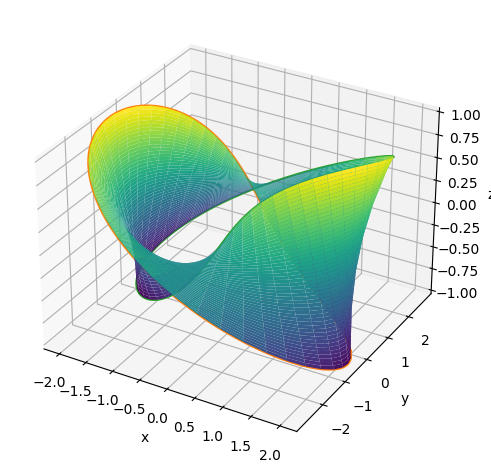

In [327]:
plt1 = plotting.plot3d_parametric_surface(*q, (u, -1, 1), (t, 0, 2*pi), show=False)
plt1.append(plotting.plot3d_parametric_line(*q_r1,(t, 0, 2*pi), show=False)[0])
plt1.append(plotting.plot3d_parametric_line(*q_r2,(t, 0, 2*pi), show=False)[0])
plt1.show()


5. Argumentér for, at de to randkurver har samme længde.


In [328]:
simplify(diff(q_r1,t).norm())

sqrt(sin(t)**2 - 4*sin(t) + 5)

In [329]:
simplify(diff(q_r2,t).norm()).subs({t:t+pi})

sqrt(sin(t)**2 - 4*sin(t) + 5)

Det ses at hvis vi lægger $\pi$ til $t$ i den ene Jacobi-funktion, bliver de lig hinanden - hvad der blot svarer til at forskyde domænet.


6. Bestem krumningen $\kappa(t)$ af den røde randkurve (der har $u=1$ ).


In [330]:
# Definition 8.12, 8.25
p = q_r2
_v = diff(p, t).norm()
kappa = simplify(((diff(p,t).cross(diff(p,t,t))).norm()) / (_v**3))
EqPrint("\kappa(t)", kappa)

$\kappa(t) = \frac{\sqrt{8 \sin^{3}{\left(t \right)} + 39 \sin^{2}{\left(t \right)} + 72 \sin{\left(t \right)} + 41}}{\left(\sin^{2}{\left(t \right)} + 4 \sin{\left(t \right)} + 5\right)^{\frac{3}{2}}}$

In [374]:
p = Matrix([[cos(t)*(sin(t)+2), sin(t)*(sin(t) + 2), cos(t)]])
p = p.transpose()

In [375]:
tempa1 = diff(p, t).norm()
tempa2 = diff(p, t)
tempa3 = diff(p, t, t)

In [376]:
tempa4 = tempa2.cross(tempa3)
tempa4

Matrix([
[                                          -((sin(t) + 2)*cos(t) + sin(t)*cos(t))*cos(t) + (-(sin(t) + 2)*sin(t) - sin(t)**2 + 2*cos(t)**2)*sin(t)],
[                                                                         (-(sin(t) + 2)*sin(t) + cos(t)**2)*cos(t) + (4*sin(t) + 2)*sin(t)*cos(t)],
[(-(sin(t) + 2)*sin(t) + cos(t)**2)*(-(sin(t) + 2)*sin(t) - sin(t)**2 + 2*cos(t)**2) + ((sin(t) + 2)*cos(t) + sin(t)*cos(t))*(4*sin(t) + 2)*cos(t)]])

In [377]:
tempa5 = simplify(tempa4).norm()
tempa5

sqrt(Abs((cos(2*t) - 2)*cos(t))**2 + Abs(6*sin(t) + 6)**2 + Abs(2*sin(t)**3 + 2)**2)

In [378]:
tempa5/(tempa1**3)

sqrt(Abs((cos(2*t) - 2)*cos(t))**2 + Abs(6*sin(t) + 6)**2 + Abs(2*sin(t)**3 + 2)**2)/(Abs((sin(t) + 2)*sin(t) - cos(t)**2)**2 + Abs((sin(t) + 2)*cos(t) + sin(t)*cos(t))**2 + Abs(sin(t))**2)**(3/2)

In [380]:
kappa = simplify((tempa4.norm())/(tempa1**3))

In [383]:
solveset(Eq(kappa, 0), t, domain=S.Reals)

ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers)


7. Argumentér for, at der findes et punkt på hver enkelt af de to randkurver, hvor krumningen er 0.

In [281]:
sol1 = solve(kappa, 0, t)

In [282]:
sol1[0][t]

pi + asin(13/8 - 69/(64*(-6345/512 + 243*sqrt(13)/64)**(1/3)*(-1/2 - sqrt(3)*I/2)) + (-6345/512 + 243*sqrt(13)/64)**(1/3)*(-1/2 - sqrt(3)*I/2)/3)

In [283]:
simplify(diff(q_r1, t, t).transpose().norm())

sqrt(-sin(t)**2 - 8*sin(t) + 9)

In [284]:
eq1 = Eq(-sin(t)**2 - 8*sin(t)+9,0)
eq1

Eq(-sin(t)**2 - 8*sin(t) + 9, 0)

In [285]:
solve(eq1, t)

[pi/2]

In [355]:
kappa.subs({t:-(1/2)*pi})

0

Dvs. når $t=\pi/2$ er krummningen 0

## Opgave 3 fra E20
![](2022-11-08-10-29-07.png)

En parametriseret flade (keglefladen i figuren ovenfor) er givet ved
$$
\mathbf{r}(u, v)=(u \cdot \cos (v), u \cdot \sin (v), u) \quad, \quad u \in[-1,1] \quad, \quad v \in[0,2 \pi] \quad .
$$


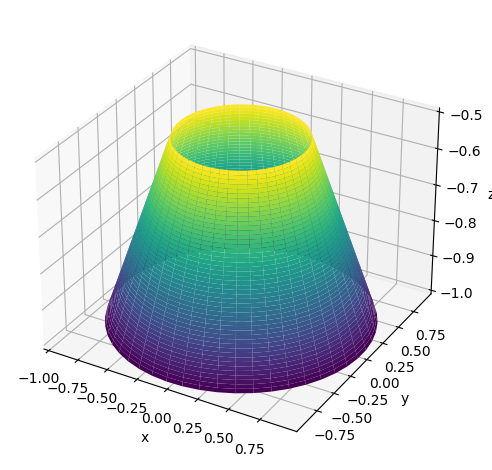

In [307]:
r = Matrix([[u*cos(v), u*sin(v),u]])
p = plotting.plot3d_parametric_surface(*r, (u, -1, -1/2), (v, 0, 2*pi), show=False)
p.show()


1. Bestem arealet af den nederste (grå) del af den viste kegleflade, svarende til parameterområdet $u \in[-1,-1 / 2], v \in[0,2 \pi]$.


In [308]:
temp = diff(r, u).cross(diff(r,v))
r_jacobi = sqrt(DotProduct(temp, temp))
areal_int = simplify(Integral(Integral(r_jacobi, (v, 0, 2*pi)), (u, -1, -S(1)/2)))
areal = areal_int.doit()

In [309]:
Markdown(f"Overflade arealet er givet ved $a={latex(areal_int)} = {latex(areal)}$")

Overflade arealet er givet ved $a=\int\limits_{-1}^{- \frac{1}{2}}\int\limits_{0}^{2 \pi} \sqrt{2} \left|{u}\right|\, dv\, du = \frac{3 \sqrt{2} \pi}{4}$

2. Bestem første fundamentalform matricen $\mathcal{F}_I(u, v)$ for fladen for alle $(u, v)$ med $u>0$.


$$\mathcal{F}_I(u,v)$$

In [310]:
def get_F_I(r):
    m = Matrix([[diff(r,u).dot(diff(r,u)), diff(r,u).dot(diff(r,v))]
        ,[diff(r,v).dot(diff(r,u)), diff(r,v).dot(diff(r,v))]])
    return m
F_I = simplify(get_F_I(r))
Markdown("$$\mathcal{F}_I(u,v)"f" = {latex(F_I)}$$")

$$\mathcal{F}_I(u,v) = \left[\begin{matrix}2 & 0\\0 & u^{2}\end{matrix}\right]$$

In [311]:
# Sætning 12.24
Eq(simplify(diff(r, u).cross(diff(r, v)).norm()), simplify(sqrt(Determinant(F_I).doit())), evaluate=False)


Eq(sqrt(2)*Abs(u), sqrt(2)*Abs(u))

Vi definerer en rumkurve $\mathbf{p}(t)$ (den røde kurve i figuren) via keglefladens parameterfremstilling:
$$
\mathbf{p}(t)=\mathbf{r}(t, t)=(t \cdot \cos (t), t \cdot \sin (t), t) \quad, \quad t \in[-1,1] \quad .
$$


7. Argumentér for, at rumkurven $\mathbf{p}(t)$ er regulær for alle $t \in[-1,1]$.

In [312]:
p = r.subs({u:t, v:t})
display(p)

Matrix([[t*cos(t), t*sin(t), t]])

In [313]:
_v = diff(p, t).norm()
Markdown(f"$v(t)={latex(_v)}$")

$v(t)=\sqrt{\left(t \sin{\left(t \right)} - \cos{\left(t \right)}\right)^{2} + \left(t \cos{\left(t \right)} + \sin{\left(t \right)}\right)^{2} + 1}$

Det ses at $v(t)$ altid vil være forskellig fra nul, og derfor er den regulær.
(Definition 8.2 siger $p'(t)\neq 0$)


8. Bestem krumningen $\kappa(0)$ af rumkurven $\mathbf{p}(t)$ i punktet svarende til $t=0$.


$$\kappa(t)=\frac{||p'(t) \times p''(t)||}{v^3(t)}$$

In [314]:
kappa = simplify(diff(p, t).cross(diff(p, t, t)).norm()/_v**3)
Markdown(f"$\kappa(t)={latex(kappa)}$")

$\kappa(t)=\frac{\sqrt{t^{4} + 5 t^{2} + 8}}{\left(t^{2} + 2\right)^{\frac{3}{2}}}$

In [315]:
Markdown(f"$\kappa(0)={latex(kappa.subs({t:0}))}$")

$\kappa(0)=1$


9. Bestem torsionen $\tau(0)$ af rumkurven $\mathbf{p}(t)$ for $t=0$.

$$\tau(t)= \frac{(p'(t) \times p''(t))\cdot p'''(t)} {||p'(t) \times p''(t)||^2}$$

In [295]:
tau = (diff(p, t).cross(diff(p, t, t))).dot(diff(p,t,t,t)) / diff(p, t).cross(diff(p, t, t)).norm()**2
tau = simplify(tau)
Markdown(f"$$\\tau(t) = {latex(tau)}$$")

$$\tau(t) = \frac{t^{2} + 6}{t^{4} + 5 t^{2} + 8}$$

In [296]:
result = tau.subs({t:0})
Markdown(f"$$\\tau(0) = {latex(result)}$$")

$$\tau(0) = \frac{3}{4}$$

## Opgave 3 fra E21
![](2022-11-08-10-36-03.png)

Den blå flade i figuren ovenfor til venstre er givet ved parameterfremstillingen

$\mathcal{P}_1: \quad \mathbf{r}(u, v)=\left((u+5) \cdot \cos (v),(u+5) \cdot \sin (v), 1-u^2\right) \quad, \quad u \in[-6,3] \quad, \quad v \in[0,2 \pi] \quad$.

En afskåret del af den blå flade er vist i nærbillede i figuren ovenfor til højre. Den del af fladen er givet ved parameterfremstillingen

$\mathcal{P}_2: \quad \mathbf{r}(u, v)=\left((u+5) \cdot \cos (v),(u+5) \cdot \sin (v), 1-u^2\right) \quad, \quad u \in[-1,1] \quad, \quad v \in[0,2 \pi] \quad$.


In [297]:
r = Matrix([[(u+5)*cos(v), (u+5)*sin(v), 1-u**2]])

class Surf3D:
    def __init__(self, r, u_dom, v_dom):
        self.r = r
        self.u_dom = u_dom
        self.v_dom = v_dom

u_dom = (u, -6, 3)
v_dom = (v, 0, 2*pi)
P1 = Surf3D(r, u_dom, v_dom)

u_dom = (u, -1, 1)
v_dom = (v, 0, 2*pi)
P2 = Surf3D(r, u_dom, v_dom)


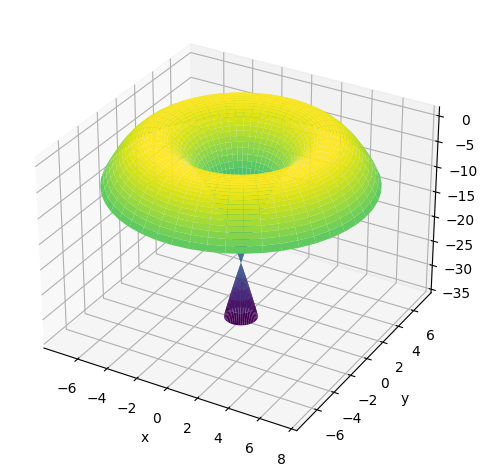

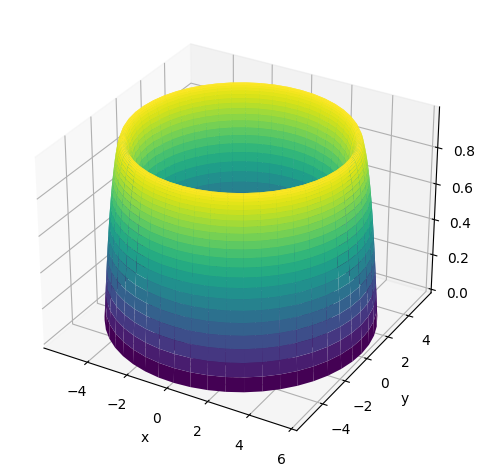

In [298]:
for P in [P1, P2]:
    p = plotting.plot3d_parametric_surface(*P.r, P.u_dom, P.v_dom, show=False)
    p.show()

1. Vis, at $\mathcal{P}_1$ IKKE er en regulær parameterfremstilling med det givne parameterområde.


In [299]:
# Definition 12.6 og 10.11
r = P1.r
#temp = diff(r,u).cross(diff(r,v)).norm()
temp = diff(r,u).cross(diff(r,v))
eq1 = Eq(temp, 0)
#solve(eq1, dict=True, domain=S.Reals)
# solveset(temp, u, domain=S.Reals)
#display(eq1)
#solveset(eq1, u, S.Reals)
#nonlinsolve(r, [u, v], S.Reals)
#solveset()
#u, v = symbols('u v', real=True)
#solve(temp, [u,v])

#display(simplify(temp))
#temp2 = diff(temp, u)
#sol = solve(simplify(temp2), 0, dict=True)
#display(sol)
#display(sol[0][u])
#simplify(temp.subs({u:sol[1][u]}))
#display(simplify(temp))


#simplify(temp.transpose())
#temp.subs({u:-5})

solve(Eq(temp, Matrix([[0,0,0]])))

[{u: -5}]

Det ses at når $u=-5$, er udtrykket lig nul. Derfor er $\mathcal{P}_1$ ikke regulær.

2. Vis, at $\mathcal{P}_2$ ER en regulær parameterfremstilling med det givne parameterområde.


I forrige spørgsmål blev der løst for 0 med  $(u, v) \in \mathbb{R}$ - trods opagven havde et begrænset domæne. Der blev kun fundet en løsning, og denne ligger uden for $u \in [-1, 1]$. Derfor er $\mathcal{P}_2$ regulær.

3. Bestem arealet af $\mathcal{P}_2$-fladen.


In [300]:
r = P2.r
r_jac = diff(r,u).cross(diff(r,v)).norm()
areal_int = simplify(Integral(Integral(r_jac, (u, -1, 1)), (v, 0, 2*pi)))
Markdown(f"$$A={latex(areal_int)}$$")

$$A=\int\limits_{0}^{2 \pi}\int\limits_{-1}^{1} \sqrt{4 u^{2} + 1} \left|{u + 5}\right|\, du\, dv$$

In [301]:
areal = areal_int.doit()
Markdown(f"$A={latex(areal)} = {latex(areal.evalf())}$")

$A=2 \pi \left(\frac{5 \operatorname{asinh}{\left(2 \right)}}{2} + 5 \sqrt{5}\right) = 92.9247203268241$

4. Bestem volumenet af det område i rummet, som er afgrænset af $\mathcal{P}_2$-fladen og $(x, y)$-planen (den grønne plan i figurerne).


In [302]:
M_r = Matrix(r)
M_r[2] *= t
M_r.transpose()

Matrix([
[(u + 5)*cos(v)],
[(u + 5)*sin(v)],
[  t*(1 - u**2)]])

In [303]:
M_r_jac = simplify(diff(M_r,u).cross(diff(M_r,v)).dot(diff(M_r, t)))
display(M_r_jac)
vol_int = simplify(Integral(Integral(Integral(M_r_jac, (u, -1, 1)), (v, 0, 2*pi)), (t, 0, 1)))
vol_int
#Markdown(f"$$A={latex(areal_int)}$$")

-(u + 5)*(u**2 - 1)

40*pi/3

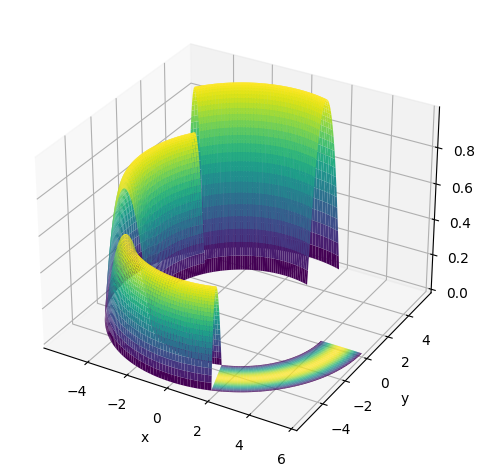

In [304]:
p = plotting.plot3d_parametric_surface(*M_r.subs({t:0.001}), P2.u_dom, (v, 2*pi,1.6*pi), show=False)
p.append(plotting.plot3d_parametric_surface(*M_r.subs({t:0.5}), P2.u_dom, (v, 1.6*pi,1.2*pi), show=False)[0])
p.append(plotting.plot3d_parametric_surface(*M_r.subs({t:0.75}), P2.u_dom, (v, 1.2*pi,0.8*pi), show=False)[0])
p.append(plotting.plot3d_parametric_surface(*M_r.subs({t:1}), P2.u_dom, (v, 0.8*pi,0.4*pi), show=False)[0])
p[0].style = 'wireframe'
p[1].style = 'wireframe'
p[2].style = 'wireframe'
p[3].style = 'wireframe'
p.show()

5. Bestem første fundamentalform matricen $\mathcal{F}_I(u, v)$ for $\mathcal{P}_2$-fladen.

In [305]:
r = P2.r
F_I = simplify(get_F_I(r))
Markdown("$$\mathcal{F}_I(u,v)"f" = {latex(F_I)}$$")

$$\mathcal{F}_I(u,v) = \left[\begin{matrix}4 u^{2} + 1 & 0\\0 & \left(u + 5\right)^{2}\end{matrix}\right]$$